In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
funds = [{'fund_cd': '201609080B', 'fund_name': 'iFreeTOPIXインデックス', 'asset_class': '国内株式'}, 
        {'fund_cd': '201609080D', 'fund_name': 'iFree外国株式インデックス(H無)', 'asset_class': '先進国株式'},
        {'fund_cd': '201609080F', 'fund_name': 'iFree新興国株式インデックス', 'asset_class': '新興国株式'},
        {'fund_cd': '2016090810', 'fund_name': 'iFree日本債券インデックス', 'asset_class': '国内債券'},
        {'fund_cd': '2016090811', 'fund_name': 'iFree外国債券インデックス', 'asset_class': '先進国債券'},
        {'fund_cd': '2016090812', 'fund_name': 'iFree新興国債券インデックス', 'asset_class': '新興国債券'}, 
        {'fund_cd': '2016090813', 'fund_name': 'iFreeJ-REITインデックス', 'asset_class': '国内リート'},
        {'fund_cd': '2016090814', 'fund_name': 'iFree外国REITインデックス', 'asset_class': '先進国リート'}
       ]

In [3]:
fundsdata = pd.read_csv('csv/'+funds[0]['fund_cd']+'.csv')
fundsdata = fundsdata.drop('基準価額', axis=1)
for fund in funds:
    df = pd.read_csv('csv/'+fund['fund_cd']+'.csv')
    df = df.rename(columns={'基準価額': fund['asset_class']})
    fundsdata = pd.merge(fundsdata, df, on='日付')

In [4]:
# 最適ポートフォリオリバランスなし
ganpon = 1000000
portbase = fundsdata.drop('日付', axis=1)
init_weight = pd.read_csv('port.csv',names=portbase.columns)

In [10]:
# 数量、評価額、ポートフォリオ全体の評価額を計算
init_val = ganpon*init_weight
init_num = init_val*10000/portbase.loc[0]
nums_noreb = pd.DataFrame(np.ones((len(fundsdata.index),8)),columns=portbase.columns)
val_noreb = nums_noreb.copy()
port_noreb = pd.DataFrame(np.ones((len(fundsdata.index),1)),columns=['port'])
alc_noreb = nums_noreb.copy()

In [13]:
for index, row in nums_noreb.iterrows():
    nums_noreb.loc[index] = init_num.loc[0]
    val_noreb.loc[index] = nums_noreb.loc[index] * portbase.loc[index] /10000
    port_noreb.loc[index] = val_noreb.loc[index].sum()
    alc_noreb.loc[index] = val_noreb.loc[index]/port_noreb.loc[index]

In [20]:
# 最適ポートフォリオ四半期リバランス
nums_rebq = nums_noreb.copy()
vals_rebq = nums_rebq.copy()
port_rebq = pd.DataFrame(np.ones((len(fundsdata.index),1)),columns=['port'])
alc_rebq = nums_rebq.copy()

In [21]:
qdays=[20161003,	20170104,	20170403,	20170703,	20171002,	20180104,	20180402,	20180702,	20181001,	20190104,	20190401,	20190701,	20191001,	20200106,	20200401,	20200701,	20201001,	20210104,	20210401,	20210701,	20211001,	20220104,	20220401,	20220701,	20221003]

In [28]:
v=vals_rebq.loc[100].sum()*init_weight

In [29]:
v.loc[0]

国内株式       31665.844233
先進国株式     432766.537855
新興国株式      31665.844233
国内債券       31665.844233
先進国債券     189995.065400
新興国債券      31665.844233
国内リート     274437.316688
先進国リート     31665.844233
Name: 0, dtype: float64

In [30]:
for index, row in vals_rebq.iterrows():
    if fundsdata.loc[index, '日付'] in qdays:
        v=vals_rebq.loc[index-1].sum()*init_weight
        vals_rebq.loc[index] = v.loc[0]
        nums_rebq.loc[index] = vals_rebq.loc[index]*10000/fundsdata.loc[index,vals_rebq.columns]
    elif index == 0:
        nums_rebq.loc[index] = nums_rebq.loc[index]
        vals_rebq.loc[index] = nums_rebq.loc[index] *fundsdata.loc[index,vals_rebq.columns]/10000
    else:
        nums_rebq.loc[index] = nums_rebq.loc[index-1]
        vals_rebq.loc[index] = nums_rebq.loc[index] *fundsdata.loc[index,vals_rebq.columns]/10000

In [31]:
port_rebq = vals_rebq.sum(axis=1)
for index, row in alc_rebq.iterrows():
    alc_rebq.loc[index] = vals_rebq.loc[index]/port_rebq.loc[index]

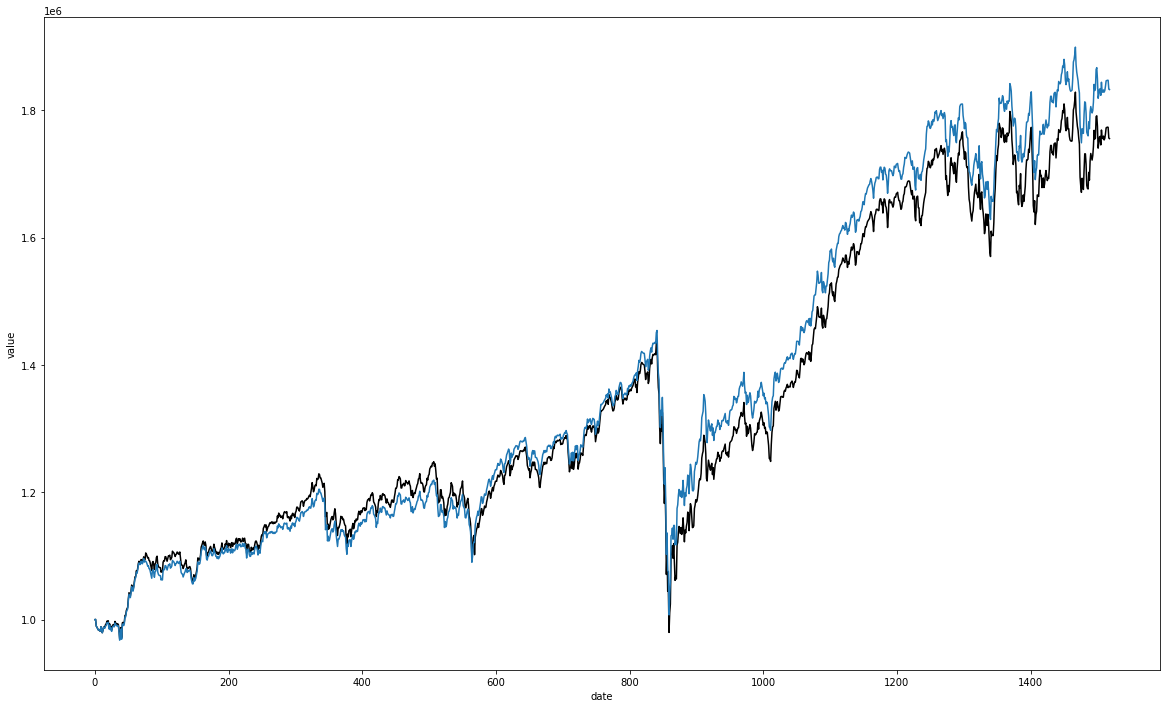

In [32]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, xlabel='date', ylabel='value')

ax.plot(port_noreb,c='k')
ax.plot(port_rebq)
